## Intro 

In this project, we're going to download and analyze the data on RNA sequences of COVID in two of its major variants: Delta and Omicron. RNA is a nucleic acid present in any living cell that has one strand consisting of various combinations of four nucleotides: uracil, cytosine, adenine, and guanine. RNA is the "source code" for COVID that enables the virus to enter the cell and replicate itself.

We'll be using the available data from NIH (National Institutes of Health), the federal government agency in the U.S. You can download the dataset containing the metadata for each COVID RNA sequence from this link (https://drive.google.com/file/d/1S2ZDjdRkY78kZxBtc9YNUh0mByTHXQ23/view) and look at its documentation here (https://www.ncbi.nlm.nih.gov/datasets/docs/v1/reference-docs/data-packages/sars-cov-2-genome/). If you want to dig deeper and explore more Covid datasets, you can check other data here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ncbi_datasets.csv")
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


In [3]:
df.dtypes

Nucleotide Accession     object
Species Taxonomy Id       int64
Species Name             object
Virus Genus              object
Virus Family             object
Isolate Name             object
Nucleotide Length         int64
Sequence Type            object
Nuc Completeness         object
Geo Location             object
US State                float64
Host Name               float64
Host Taxonomy ID          int64
Collection Date          object
BioProject               object
BioSample                object
dtype: object

Based on the types of of dataframe we have we need to convert some of the data to the correct types. The ones that we need to convert are the collection date to a datetime format

In [4]:
df['Collection Date']=pd.to_datetime(df['Collection Date'])

In [5]:
#checking the types again and confirming
df.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [6]:
df.shape

(847791, 16)

In [7]:
#going to make the dataframe a bit simplier so that we only have the continent not the country
#we splitted the values in the column based on ; and then grab only the first value of it

df['Continent']=df['Geo Location'].str.split(';').str[0]
df['Continent']

0                  Asia
1         North America
2                  Asia
3                  Asia
4         North America
              ...      
847786           Europe
847787           Europe
847788           Europe
847789           Europe
847790           Europe
Name: Continent, Length: 847791, dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Species Taxonomy Id,847791.0,2.697049e+06,0.000000,2697049.0,2697049.0,2697049.0,2697049.0,2697049.0
Nucleotide Length,847791.0,2.982575e+04,69.937482,2859.0,29786.0,29819.0,29884.0,30018.0
US State,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Taxonomy ID,847791.0,9.606000e+03,0.000000,9606.0,9606.0,9606.0,9606.0,9606.0


In [9]:
df.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487,North America
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251,North America


## EDA



In [10]:
#groups by continent and then only takes the first value in the collection date

first_occurnace=df.groupby("Continent").apply(lambda x: x.sort_values("Collection Date").iloc[0])
first_occurnace[['Collection Date']]

,Collection Date
Continent,
Africa,2020-02-06
Asia,2019-12-01
Europe,2020-01-01
North America,2020-01-01
Oceania,2020-01-01
South America,2020-01-01


Based on this we can see that Asia was the first COVID RNA sequence was collected. All of the other continents were then collected not so long after that and were relatively around the sametime as well.  

In [11]:
df['Continent'].value_counts()

North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: Continent, dtype: int64

Based here we can see that North America had the highest number of sequences collected while South America had the lowest.

In [12]:
# the sequence of the virus comes from Nucleotide Length so we will use that to determine the highest and lowest sequence
df['Nucleotide Length'].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: Nucleotide Length, dtype: float64

Based on this we can see that shortest length is 2859 and the largest is 30018. But the lowest length seems really off as everything else is above 29000 so lets visually this and also find how many times the lowest occurnace occurs.

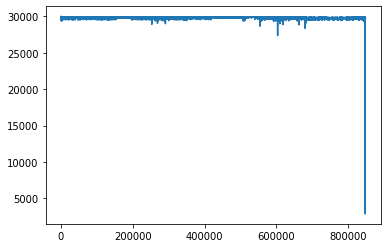

In [13]:
df['Nucleotide Length'].plot()

In [14]:
df[df['Nucleotide Length']==2859.000000]

### or we can do this also
#df[df['Nucleotide Length']==df['Nucleotide Length'].min()]
###

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


Based on the above code there is only one occurance of having the lowest occuring. So this might be an outlier but we should still consider it regradless.




In [15]:
#making a new column that get the month and the year
df['Month']=pd.DatetimeIndex(df['Collection Date']).to_period('M')
df['Month']

0         2019-12
1         2021-12
2         2020-01
3         2020-01
4         2021-09
           ...   
847786    2020-11
847787    2020-12
847788    2020-12
847789    2020-11
847790        NaT
Name: Month, Length: 847791, dtype: period[M]

In [16]:
df['Month'].value_counts().sort_index()

2019-12        16
2020-01     17707
2020-02       385
2020-03     12333
2020-04     13298
2020-05      6529
2020-06      9506
2020-07     11398
2020-08     11702
2020-09     13166
2020-10     20743
2020-11     28892
2020-12     35350
2021-01     68563
2021-02     44564
2021-03     48905
2021-04     69412
2021-05     39809
2021-06     20994
2021-07     22498
2021-08     11412
2021-09     15102
2021-10     17598
2021-11    102642
2021-12    131297
2022-01     73324
2022-02       450
Freq: M, Name: Month, dtype: int64

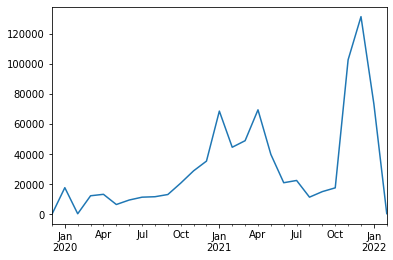

In [17]:
df['Month'].value_counts().sort_index().plot()

Based on the graph we can see that the lowest colection was in the beginning which makes sense as thats when collection was occuring. We can also see that there was a massive spike in collection starting from Oct 2021 and then a decrease as the months went on.

## Identifying Sequences to Download

Now, we'll analyze the sequences themselves rather than the metadata. To do that, we first need to find some sequences we want to analyze. Let's consider the following sequences:

- The reference sequence: the first COVID genome that was fully sequenced.

- A base sequence: for example, the first sequence for North America.

- One of the Delta sequences (one of the most common COVID variants).

- One of the Omicron sequences (another common COVID variant).


Once we get all of the sequences we need to get their ID so that we can use it later

In [19]:
#findng all the sequences
df['Sequence Type'].unique()

array(['RefSeq', 'GenBank'], dtype=object)

In [18]:
##finding the ref sequence
df[df['Sequence Type']=='RefSeq']

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia,2019-12


Since the sequences are only GeoBank or RefSeq we know that the other sequences are going to be in the Isolate name. The reason why because we get the unique values from there we can find all the sequeneces that we need.


In [20]:
#getting all unique isloate name
df['Isolate Name'].unique()

array(['Wuhan-Hu-1', 'SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021',
       'SARS-CoV-2/human/HKG/VM20001061-2/2020', ..., 'a929', 'a850',
       'a1290'], dtype=object)

In [24]:
#we need to label na=False or else it will not run as there are missing name in the dataframe
df[df['Isolate Name'].str.contains("Delta", na=False)]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia,2021-08
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia,2021-08
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia,2021-08
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia,2021-08


In this case we can see that we got all the sequeneces tha contian delta in the dataset. We are going to grab one of the name to use. Simarily we are going to grab Omicron using the same logic.

In [25]:
df[df['Isolate Name'].str.contains("Omicron", na=False)]

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia,2021-12


In this case we only have one sequence to use so we will use that. As for the base sequence we are just going to get one sequence that had occurred in North America and use that as our base.

In [26]:
df[df['Continent']=='North America']

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487,North America,2021-12
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251,North America,2021-09
5,OM389146.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/GA-EHC-117N/2020,29790,GenBank,complete,North America; USA,NaN,NaN,9606,2020-03-30,PRJNA634356,SAMN16129847,North America,2020-03
6,OM389144.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/GA-EHC-111G/2020,29797,GenBank,complete,North America; USA,NaN,NaN,9606,2020-03-30,PRJNA634356,SAMN16129844,North America,2020-03
7,OM389143.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/GA-EHC-087I/2020,29817,GenBank,complete,North America; USA,NaN,NaN,9606,2020-03-10,PRJNA634356,SAMN24965877,North America,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843445,MZ491464.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/NV-CDC-QDX25762934/2021,29760,GenBank,complete,North America; USA: Nevada,NaN,NaN,9606,2021-06-13,NaN,NaN,North America,2021-06
843446,MZ468013.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/MN-MDH-8352/2021,29768,GenBank,complete,North America; USA: Minnesota,NaN,NaN,9606,2021-06-19,PRJNA628662,NaN,North America,2021-06
843447,MZ280957.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/CA-CDC-ASC210060954/2021,29858,GenBank,complete,North America; USA: California,NaN,NaN,9606,2021-05-08,NaN,NaN,North America,2021-05
843448,MZ143018.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/TX-CDC-LC0052521/2021,29704,GenBank,complete,North America; USA: Texas,NaN,NaN,9606,2021-04-18,NaN,NaN,North America,2021-04


In [34]:

sequences=['NC_045512.2','OL467832.1','OM061695.1','OM095411.1']
#mapping to each one of the sequences
human_name=['reference','base','delta','omicron']

Now that we got all the sequences that we want we are going to grab all the data that has these sequences

In [35]:
#thsi grabs all the datapoints that are in the sequence list we had made above
selected_seq=df[df['Nucleotide Accession'].isin(sequences)]
selected_seq.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample,Continent,Month
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia,2019-12
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia,2021-08
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America,2020-01
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia,2021-12


## Downloading the Sequences

Next, let's download the actual nucleotide sequence for each of the selected COVID RNA sequences. We're going to use a Python library called Biopython that allows us, among many other things, to look up RNA and DNA sequences by their accession number and then download them.

We are then going to create a function that takes in a sequence ID (accession number) and returns the actual nucleotide sequence.

In [32]:
!pip install biopython
from Bio import Entrez
Entrez.email = 'jaysekhon9@gmail.com'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.1 MB/s eta 0:00:00


In [33]:
def download_sequence(id_code):
  #what this line does is that it searches in the nh databases, in this case we are going to ask it to search the nucleotide database
  # and search using our id code and then only return a single value
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    #going to read the esult from the search handles
    record = Entrez.read(handle)
    #we then need to do another search to use this module
    #going to search again in the nucleotide database,pass in out id, get the sequence in fasta format and finally get the result in text format
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    #return the handle
    return handle.read()

In [36]:
#make the sequences_data as a dictionary
sequence_data = {}

#this is going to loop through all of ou sequences and for each one it is going to download the sequence
#from the nh database and store it into the dictionary
for sequence in sequences:
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}

In [37]:
#lloking at how it the sequences
sequence_data

{'NC_045512.2': {'fasta': '>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCT

## Parsing RNA Sequences

Now, let's extract the actual genomic sequences from the dictionary we've just created and convert them from Fasta into a more readable format that we can easily work with to analyze the data. To do so, we're going to use a Fasta parser from Biopython.



In [38]:
from Bio import SeqIO
import io
#loops thorugh all the keys in our sequences data, in this case the keys are the id's
for k,v in sequence_data.items():
  #creating a file object so that we can parse it in the next step
    f = io.StringIO(v["fasta"])
    #parsign the file object and make a new key in our ditcionary called parase and only return the first value
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]

In [39]:
#checkng to see if the file works
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [40]:
sequence_data["OM095411.1"]["parsed"]

SeqRecord(seq=Seq('CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTG...AGC'), id='OM095411.1', name='OM095411.1', description='OM095411.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/CHN/Omicron-1/2021, complete genome', dbxrefs=[])

## Aligning RNA Sequences
Now that we've fetched the actual COVID nucleotide sequences in a readable format, let's try to align them in relation to the number and succession of nucleotides to determine how the virus has mutated over time.

For context, when we have an original (reference) RNA sequence and a variant of it (e.g., omicron), there are three patterns of mutation for these sequences:

- Deletion — a nucleotide can be removed from the original sequence to the variant sequence.

- Substitution — a nucleotide from the original sequence can shift into the new sequence.

- Insertion — a new nucleotide can be added to the variant sequence from the original one.

This is how an RNA strand can change, or, in our case, how the initial COVID virus can turn to its variants.

We need to determine which parts of two selected RNA sequences align and which don't. In other words, we need to determine the difference between the sequences. For this purpose, we're going to use an alignment algorithm from Biopython, calculate the alignment score between the sequences, and draw conclusions about the difference between them


In [42]:
from Bio import Align
#this helps us align multiple sequences
aligner = Align.PairwiseAligner()

In [44]:
#this is the algorthim that the aligner is using
aligner.algorithm

'Needleman-Wunsch'

In [45]:
#this is finding the alignment between the reference sequence and one other sequence 
#.seq gives us the actuakl sequence from the parsed data structure ie only get the sequence (CAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT)
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq, sequence_data["OM061695.1"]["parsed"].seq)
score

29818.0

In [47]:
#how long our reference sequence is
len(sequence_data["NC_045512.2"]["parsed"].seq)

29903

In [48]:
29818.0/29903

0.9971574758385446

The score that we found tells us how aligned the sequences are in relation to the number of nucleotide in the sequence. Based on the above 2 sequences we can see that these two are pretty farily aligned (99% aligned). So betweeen the reference sequences and the first coded sequence in North America the virus did not mutate alot between fist being sequenced in China and then later being sequences a couple months later in North America. 

## Checking Alignment Across Variants

Next, we can look at this score between all of the sequences from our dictionary. In other words, we need to compare the sequences pairwise in terms of their alignment scores and extract insights from those numbers.

In [49]:
##we make a 4X4 matrix since we have 4 sequence and we want to compare each sequnece with another
comparisons = np.zeros((4,4))
#loops through our sequences list twice and then compare each sequence with each other sequence
for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq, sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [50]:
#making our comparison into a dataframe
comparison_df = pd.DataFrame(comparisons, columns=human_name, index=human_name)

In [51]:
comparison_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


This is a bit hard to read so we are going to do the following:

get the first column of the comparison matrix and divide it by the length of the reference sequence

In [52]:
comparison_df.iloc[:,0] / 29903

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

Based on this we know that the base is a sequence from North America two months after reference sequences so the overlap is quite high. Delta is also very high but still lower than the base and omicron is diverged a little more. So as time goes on it seems like the virus is mutating more and more but also at the same time not mutating all that much. 

## Showing Sequence Mismatches

Our next step is to look at the exact mutation points between any two sequences. For this purpose, let's take two sequences and use Biopython to find their overlaps and mutation points.

In [53]:
#we are grabbing these two values and then align them
seq1 = sequence_data["NC_045512.2"]["parsed"].seq
seq2 = sequence_data["OM061695.1"]["parsed"].seq
delta_alignments = aligner.align(seq1,  seq2)

In [54]:
delta_alignments

In [55]:
delta_alignment = delta_alignments[0]

In [56]:
delta_alignment.shape

(2, 29943)

Two alignemnts for nucleotides and there is 29943 nucleotides that were aligned

In [57]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 

In [58]:

seq1_end = None
seq2_end = None

#zip basically takes the first element from both lumps them together into one list, takes the second element from both and lumps them together and so on
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    #loops through the list of alignments find the end of the last alignment (where the mutation takes place) for each sequence, and print out the mismatches
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        print("1: {}".format(seq1_mismatch))
        print("2: {}".format(seq2_mismatch))
    #after each iteration the end sequence is the previous alignment
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


## Color Coding Mismatches

There are two issues with the result from above:

- It doesn't show where exactly the mismatch happened.

- It doesn't show the type of mismatch (insertion, deletion, or substitution).

One way to fix it is by applying color coding in the HTML format using IPython. The idea is to display in different colors the nucleotide composition of the following:

- All the portions of both sequences that are aligned

- All the types of mismatches, including insertions, deletions, and substitutions

In [59]:
from IPython.display import HTML

def color_print(s, color='black'):
    return "<span style='color:{}'>{}</span>".format(color, s)

In [60]:
#taking the same code as above and now do the following:
#if len(seq2_mismatch)==0 then make the color red and that will represents deletion
#if len(seq1_mismatch)==0 then make the color green and that will represents insertion
#otherwise make the color blue and that will represents substitution

seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    
    if seq1_end and seq2_end:
        seq1_mismatch = seq1[seq1_end:alignments[0][0]]
        seq2_mismatch = seq2[seq2_end:alignments[1][0]]
        if len(seq2_mismatch)==0:
            display_seq.append(color_print(seq1[seq1_end:alignments[0][0]], "red"))
        elif len(seq1_mismatch)==0:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "green"))
        else:
            display_seq.append(color_print(seq2[seq2_end:alignments[1][0]], "blue"))
    #append all the regular alignments and all the mismatches to a list
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
    
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [61]:
display_seq = [str(i) for i in display_seq]
display(HTML('<br>'.join(display_seq)))

# Next Steps

There are a few things you can do if you want to continue this analysis. Consider the following:

- Explore the chemical composition of the COVID RNA sequences and determine which proteins are encoded there and how they differ between the variants.

- Explore the mutation patterns of some other variants over time.

- Look at the most common insertion, deletion, and substitution sites to see which ones are changing most or least rapidly.